In [1]:
from ultralytics import YOLO
from PIL import Image
import imutils
import matplotlib.pyplot as plt
import time
import cv2
import pafy
from collections import defaultdict
import numpy as np
import email, smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
import base64
import socket

In [13]:
server_address = ('192.168.0.3', 12345)  # Change the IP address and port as needed
sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

try:
    # Connect to the server
    sock.connect(server_address)
    print("Connection Established")
    # Send a message
  #  message = "Hello, server!"

    #sock.sendall(message.encode())

    # Receive a response from the server (optional)
    try:
        response = sock.recv(8192)
        print("Received:", response.decode())
    finally:
        sock.close()
except Exception as e:
    print(e)
    


Connection Established
Received: 
Enter cmd : 


In [2]:
sender_email = 'kingougame@yahoo.com'
receiver_email = 'kingougame@yahoo.com'
subject = 'Subject of the email'
body = 'This is the body of the email.'

# Create a MIMEText object to represent the email content
message = MIMEMultipart()
message['From'] = sender_email
message['To'] = receiver_email
message['Subject'] = subject
message.attach(MIMEText(body, 'plain'))

# SMTP server settings for Yahoo Mail
smtp_server = 'smtp.mail.yahoo.com'
smtp_port = 587  # Yahoo SMTP port

# Create an SMTP session and start TLS encryption
server = smtplib.SMTP(smtp_server,smtp_port)
server.starttls()

# Login to your Yahoo Mail account
yahoo_email = 'kingougame@yahoo.com'
yahoo_password = 'Newbie4life'
server.set_debuglevel(1)
server.login(yahoo_email, yahoo_password)

# Send the email
server.sendmail(sender_email, receiver_email, message.as_string())

# Close the SMTP session
server.quit()

print('Email sent successfully.')

send: 'ehlo [172.30.80.1]\r\n'
reply: b'250-hermes--production-bf1-7d6dbd57c9-5k9fq Hello [172.30.80.1] [69.79.197.178])\r\n'
reply: b'250-PIPELINING\r\n'
reply: b'250-ENHANCEDSTATUSCODES\r\n'
reply: b'250-8BITMIME\r\n'
reply: b'250-SIZE 41697280\r\n'
reply: b'250 AUTH PLAIN LOGIN XOAUTH2 OAUTHBEARER\r\n'
reply: retcode (250); Msg: b'hermes--production-bf1-7d6dbd57c9-5k9fq Hello [172.30.80.1] [69.79.197.178])\nPIPELINING\nENHANCEDSTATUSCODES\n8BITMIME\nSIZE 41697280\nAUTH PLAIN LOGIN XOAUTH2 OAUTHBEARER'
send: 'AUTH PLAIN AGtpbmdvdWdhbWVAeWFob28uY29tAE5ld2JpZTRsaWZl\r\n'
reply: b'535 5.7.0 (#AUTH005) Too many bad auth attempts.\r\n'
reply: retcode (535); Msg: b'5.7.0 (#AUTH005) Too many bad auth attempts.'
send: 'AUTH LOGIN a2luZ291Z2FtZUB5YWhvby5jb20=\r\n'


SMTPServerDisconnected: Connection unexpectedly closed

In [2]:
# Load a COCO-pretrained YOLOv8n model
model = YOLO('yolov8n.pt')

# Display model information (optional)
model.info()

# Train the model on the COCO8 example dataset for 100 epochs
#results = model.train(data='coco8.yaml', epochs=100, imgsz=640)


YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs


(225, 3157200, 0, 8.8575488)

In [40]:
frame = cv2.imread('JPEGImages/000940.jpeg')  # Replace 'path_to_frame.jpg' with your frame file path
# video_url = 'https://youtu.be/EGuDzm2N4z8?t=1842'

# # Load the video using pafy
# video = pafy.new(video_url)
# best = video.getbest(preftype="mp4")
# capture = cv2.VideoCapture(best.url)
# capture.set(cv2.CAP_PROP_FRAME_COUNT, 100)
# succ, frame = capture.read()
# cap = cv2.VideoCapture('Brasil1.mp4')
# suc, frame = cap.read()

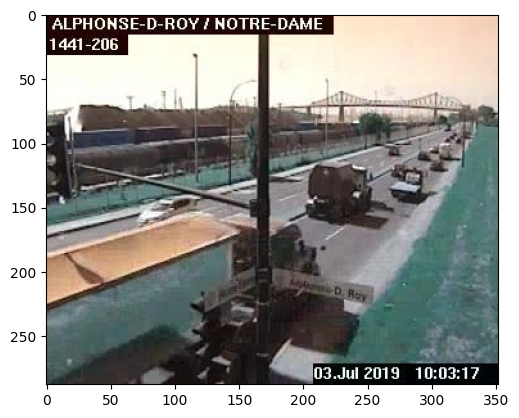

In [41]:
# capture.set(cv2.CAP_PROP_POS_FRAMES, 1000)
# succ, frame = capture.read()
plt.imshow(frame)

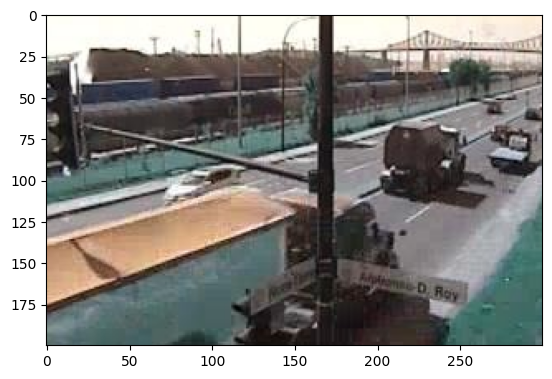

In [44]:
#img = imutils.rotate(frame,48)
img = frame[50:250, 0:300]
plt.imshow(img)

In [46]:
results = model(frame, classes=[2,3,5,7])

0: 544x640 (no detections), 475.0ms
Speed: 43.0ms preprocess, 475.0ms inference, 12.0ms postprocess per image at shape (1, 3, 544, 640)


In [35]:
#100pixels per meter, 5.2*5.0 = 26
area = 28
vehicles = len(results[0].boxes.cls)
density = vehicles/area
density

0.32142857142857145

In [36]:
def get_density(frame,bounds):
    y = bounds[0]
    x = bounds[1]
    frame = frame[y[0]:y[1], x[0]:x[1]]
    result = model(frame, classes=[2,3,5,7])
    area = ((y[1]-y[0])/200) * ((x[1]-x[0])/200)
    vehicles = len(results[0].boxes.cls)
    return vehicles/area

In [44]:
cap = cv2.VideoCapture('Brasil1.mp4')
fps = int(cap.get(cv2.CAP_PROP_FPS))
count = 0
bounds = ((0,1080),(250,1500))
frames = []
densities = []

while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()
    if success:
        if count%(fps*2) == 0:
        # Run YOLOv8 tracking on the frame, persisting tracks between frames
           frames.append(frame)
           results = model(frame, classes=[2,3,5,7])
           dense = get_density(frame,bounds)
           print(dense)
           densities.append(dense)

           annotated_frame = results[0].plot()
        #cv2.imshow("YOLOv8 Tracking", annotated_frame)
           #10 frames, density
           if len(frames) > 3:
                congestion = np.mean(densities)
                if congestion >= 0.1:
                    traffic = True
                    print("High")
                else:
                    traffic = False

        # Break the loop if 'q' is pressed
        #    if cv2.waitKey(1) & 0xFF == ord("q"):
        #        break
    else:
        # Break the loop if the end of the video is reached
        break
    count += 1

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()



0: 384x640 1 bus, 417.0ms
Speed: 5.0ms preprocess, 417.0ms inference, 7.0ms postprocess per image at shape (1, 3, 384, 640)

0: 576x640 1 bus, 1 truck, 349.0ms
Speed: 9.0ms preprocess, 349.0ms inference, 3.0ms postprocess per image at shape (1, 3, 576, 640)
0.02962962962962963

0: 384x640 (no detections), 238.0ms
Speed: 5.0ms preprocess, 238.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 576x640 (no detections), 291.0ms
Speed: 7.0ms preprocess, 291.0ms inference, 3.0ms postprocess per image at shape (1, 3, 576, 640)
0.0

0: 384x640 (no detections), 225.0ms
Speed: 5.9ms preprocess, 225.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 576x640 (no detections), 272.0ms
Speed: 9.0ms preprocess, 272.0ms inference, 7.0ms postprocess per image at shape (1, 3, 576, 640)
0.0

0: 384x640 (no detections), 212.0ms
Speed: 4.8ms preprocess, 212.0ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 576x640 (no detections), 274.0ms
S

In [48]:
len(densities)

19

In [51]:
#results = model.track(source="https://youtu.be/LNwODJXcvt4", show=True, tracker="botsort.yaml")
bbox = results[0].boxes.xyxy[0] # Get the first bounding box
xmin, ymin, xmax, ymax = bbox

# Read the original image
image = cv2.imread('traffic.jpg')

# Crop the bounded box region
bounded_box_image = image[int(ymin):int(ymax), int(xmin):int(xmax)]

# Display the cropped image
cv2.imshow('Bounded Box Image', bounded_box_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Save the cropped image to a file
cv2.imwrite('bounded_box_image.jpg', bounded_box_image)

True

In [4]:

# YouTube video URL or ID
video_url = 'https://www.youtube.com/watch?v=7I8uU730tTs'

# Load the video using pafy
video = pafy.new(video_url)
best = video.getbest(preftype="mp4")
capture = cv2.VideoCapture(best.url)
fps = int(capture.get(cv2.CAP_PROP_FPS))
count = 0
while True:
    ret, frame = capture.read()
    if not ret:
        break

    # Perform object detection on the frame using Ultralytics YOLO
    # Replace the following line with your YOLO inference code
    if count%(fps*2) == 0:
       result = model(frame, verbose=False)
       print(count)
       print(len(result[0].boxes.cls)/10)
    # Display the frame with object detection results
       cv2.imshow('YOLO Object Detection', frame)
       cv2.imwrite(f'saved_frame{count}.jpg', result[0].plot())
       count += 1
       if cv2.waitKey(1) & 0xFF == ord('q'):
           break
    elif count < 500:
         count += 1
    else:
         break
    

capture.release()
cv2.destroyAllWindows()


0
1.0
60
1.6
120
0.8
180
0.8
240
0.9
300
1.3
360
1.2
420
0.8
480
1.4


In [28]:
video_url = 'https://www.youtube.com/watch?v=7I8uU730tTs'

# Load the video using pafy
video = pafy.new(video_url)
best = video.getbest(preftype="mp4")
cap = cv2.VideoCapture(best.url)
count = 0

track_history = defaultdict(lambda: [])
# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()
    track_ids = []
    if success:
        # Run YOLOv8 tracking on the frame, persisting tracks between frames
        results = model.track(frame, classes=[2,3,5,7], persist=True)

        if results[0].boxes.id != None:
           boxes = results[0].boxes.xyxy.cpu().numpy().astype(int)
           track_ids = results[0].boxes.id.cpu().numpy().astype(int)
           confidences = results[0].boxes.conf.cpu().numpy().astype(int)
       # boxes = results[0].boxes.xywh.cpu()
       # track_ids = results[0].boxes.id.int().cpu().tolist()
        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        for box, track_id in zip(boxes, track_ids):
            x, y, w, h = box
            track = track_history[track_id]
            track.append((float(x), float(y)))  # x, y center point
            if len(track) > 30:  # retain 90 tracks for 90 frames
                track.pop(0)

            # Draw the tracking lines
            points = np.hstack(track).astype(np.int32).reshape((-1, 1, 2))
            cv2.polylines(annotated_frame, [points], isClosed=False, color=(230, 230, 230), thickness=10)
        # Display the annotated frame
        cv2.imshow("YOLOv8 Tracking", annotated_frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

cv2.imwrite(f'saved_frame{count+4}.jpg', annotated_frame)
# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()


0: 384x640 1 car, 365.1ms
Speed: 6.1ms preprocess, 365.1ms inference, 8.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 449.3ms
Speed: 67.1ms preprocess, 449.3ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 275.5ms
Speed: 3.0ms preprocess, 275.5ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 256.2ms
Speed: 8.9ms preprocess, 256.2ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 233.1ms
Speed: 8.3ms preprocess, 233.1ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 226.9ms
Speed: 3.0ms preprocess, 226.9ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 268.1ms
Speed: 7.5ms preprocess, 268.1ms inference, 6.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 284.5ms
Speed: 8.8ms preprocess, 284.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 